# Install dependencies, perform imports, and download the dataset

In [44]:
%%capture
%load_ext autoreload
%autoreload 2

In [3]:
# %%capture
%cd ./net_model_dataset
!for file in *.zip; do unzip "$file"; done
!rm *.zip
%cd ../


/home/m4sulaim/jupyter/vNetRunner/net_model_dataset
Archive:  ovs.zip
   creating: ovs/
  inflating: ovs/output_dataset.pkl  
  inflating: ovs/input_dataset.pkl   
Archive:  ran.zip
   creating: ran/
  inflating: ran/output_dataset.pkl  
  inflating: ran/input_dataset.pkl   
Archive:  slice_mono_1.zip
  inflating: slice_mono/input_dataset.pkl  
Archive:  slice_mono_2.zip
  inflating: slice_mono/output_dataset.pkl  
Archive:  slice.zip
   creating: slice/
  inflating: slice/output_dataset.pkl  
  inflating: slice/input_dataset.pkl  
Archive:  upf.zip
   creating: upf/
  inflating: upf/output_dataset.pkl  
  inflating: upf/input_dataset.pkl   
/home/m4sulaim/jupyter/vNetRunner


In [4]:
from net_model_dataset.data_generatordata_generator import DataGenerator as DataGenerator
from matplotlib import pyplot as plt
import pandas as pd
import ipywidgets as widgets
from utils import *
import matplotlib as mpl
mpl.rcParams['figure.facecolor'] = 'white'
from IPython.display import display

ModuleNotFoundError: No module named 'data_generator'

# Exploring and Visualizing the RAN dataset

## Investigating the files

In [34]:
print("RAN dataset:")
!ls -lah ./ran/
print("\n\nOVS dataset:")
!ls -lah ./ovs/
print("\n\nUPF dataset:")
!ls -lah ./upf/

RAN dataset:
total 171M
drwxrwxr-x  2 m4sulaim m4sulaim 4.0K Nov  1 16:13 .
drwxrwxr-x 11 m4sulaim m4sulaim 4.0K Nov  5 10:13 ..
-rw-rw-r--  1 m4sulaim m4sulaim  64M Oct 23 16:44 input_dataset.pkl
-rw-rw-r--  1 m4sulaim m4sulaim  23K Nov  5 13:10 model.pth
-rw-rw-r--  1 m4sulaim m4sulaim 107M Oct 24 11:20 output_dataset.pkl


OVS dataset:
total 255M
drwxrwxr-x  2 m4sulaim m4sulaim 4.0K Nov  2 15:19 .
drwxrwxr-x 11 m4sulaim m4sulaim 4.0K Nov  5 10:13 ..
-rw-rw-r--  1 m4sulaim m4sulaim  98M Oct 23 16:44 input_dataset.pkl
-rw-rw-r--  1 m4sulaim m4sulaim  23K Nov  5 13:12 model.pth
-rw-rw-r--  1 m4sulaim m4sulaim 158M Oct 24 11:20 output_dataset.pkl


UPF dataset:
total 32M
drwxrwxr-x  2 m4sulaim m4sulaim 4.0K Nov  2 15:20 .
drwxrwxr-x 11 m4sulaim m4sulaim 4.0K Nov  5 10:13 ..
-rw-rw-r--  1 m4sulaim m4sulaim  11M Oct 23 16:44 input_dataset.pkl
-rw-rw-r--  1 m4sulaim m4sulaim  11K Nov  5 13:12 model.pth
-rw-rw-r--  1 m4sulaim m4sulaim  22M Oct 24 11:20 output_dataset.pkl


## Loading and sampling the dataset

In [35]:
ran_data_gen = DataGenerator("./ran/input_dataset.pkl", "./ran/output_dataset.pkl", vnf_type='RAN')
print(f"Input dataset columns: {ran_data_gen.train_input.columns.tolist()}")
print(f"Output dataset columns: {ran_data_gen.train_output.columns.tolist()}")

# Show as a table the first 5 rows of the input and output datasets
print("\n\nInput dataset sample:")
display(ran_data_gen.train_input.head())
print("\n\nOutput dataset sample:")
display(ran_data_gen.train_output.head())

Input dataset columns: ['packet_size', 'packet_rate', 'throughput', 'inter_arrival_time_mean', 'inter_arrival_time_std', 'res']
Output dataset columns: ['packet_size', 'packet_rate', 'throughput', 'inter_arrival_time_mean', 'inter_arrival_time_std', 'time_in_sys']


Input dataset sample:


,packet_size,packet_rate,throughput,inter_arrival_time_mean,inter_arrival_time_std,res
2148,1377.6186400380,3241.6601290601,35.7261713477,0.0003085792,0.0002261394,1000.0000000000
1044,1377.5713522181,1881.4484398394,20.7346357712,0.0005317883,0.0004163135,2000.0000000000
3321,1374.4513274336,3684.8917248489,40.5176345813,0.0002714521,0.0001922345,250.0000000000
439,1377.4487972509,1452.7987389307,16.0092470047,0.0006888010,0.0005736905,2500.0000000000
3519,1374.5281385281,1828.2121815865,20.1034326943,0.0005472820,0.0004050340,250.0000000000




Output dataset sample:


,packet_size,packet_rate,throughput,inter_arrival_time_mean,inter_arrival_time_std,time_in_sys
2148,1377.6186400380,2225.7451398525,24.5298239411,0.0004495015,0.0035037909,2.0510908229
1044,1377.5713522181,1876.0668920883,20.6753280431,0.0005333151,0.0006325152,0.0086550697
3321,1374.4513274336,249.5954769556,2.7444546770,0.0040242894,0.0185406513,16.8355780666
439,1377.4487972509,1456.6033978195,16.0511727872,0.0006870008,0.0006366045,0.0086841146
3519,1374.5281385281,254.9367933802,2.8033423684,0.0039395954,0.0182606686,15.2036744365


In [36]:
print("\n\nInput dataset description:")
display(ran_data_gen.train_input.describe())
print("\n\nOutput dataset description:")
display(ran_data_gen.train_output.describe())



Input dataset description:


,packet_size,packet_rate,throughput,inter_arrival_time_mean,inter_arrival_time_std,res
count,3004.0000000000,3004.0000000000,3004.0000000000,3004.0000000000,3004.0000000000,3004.0000000000
mean,1376.1307655268,2110.7267812839,23.2524468542,0.0016606935,0.0015239762,1349.7836218375
std,3.4127827627,1304.9365575197,14.3787925032,0.0030743504,0.0029965816,784.2315351247
min,1297.8000000000,72.4936783156,0.7534008996,0.0002159708,0.0001494609,250.0000000000
25%,1376.2373626374,936.7777997879,10.3176873936,0.0003085831,0.0002332783,500.0000000000
50%,1377.2232682202,2244.2394259547,24.7109057972,0.0004457843,0.0003795838,1500.0000000000
75%,1377.6504304114,3241.6183733047,35.7267637630,0.0010686307,0.0009051020,2000.0000000000
max,1378.0000000000,4631.2550649452,51.0477663531,0.0140359093,0.0163859328,2500.0000000000




Output dataset description:


,packet_size,packet_rate,throughput,inter_arrival_time_mean,inter_arrival_time_std,time_in_sys
count,3004.0000000000,3004.0000000000,3004.0000000000,3004.0000000000,3004.0000000000,3004.0000000000
mean,1376.1307655268,1530.1574139863,16.8613120182,0.0020688944,0.0062957715,2.8326933497
std,3.4127827627,1234.3134298325,13.6072874164,0.0028860087,0.0070800292,5.1576030679
min,1297.8000000000,74.7249283285,0.8171087885,0.0002195264,0.0005356581,0.0085861361
25%,1376.2373626374,466.1113827742,5.1319805490,0.0004337471,0.0007075750,0.0087760048
50%,1377.2232682202,1343.6873261219,14.8063754156,0.0007447766,0.0035810964,0.0129877405
75%,1377.6504304114,2306.4926672411,25.4195066341,0.0021500337,0.0101716657,2.1820008935
max,1378.0000000000,4556.2621515372,50.2218133616,0.0135708997,0.0378414169,17.7171356860


## Plotting the output throughput

RAN


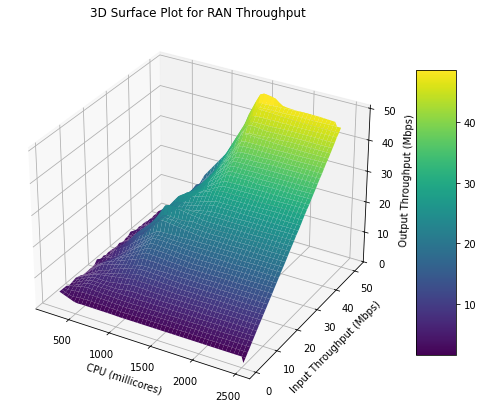

In [37]:
ran_data_gen.create_3d_plot()

## Investigating packet loss and delay


In [38]:
input_throughput = 40 # between 1 and 50 Mbps
resource_allocation = 1000 # between 250 and 2500 millicores CPU

ran_data_gen = DataGenerator("./ran/input_dataset.pkl", "./ran/output_dataset.pkl", vnf_type='RAN')
data_sample = ran_data_gen.get_nearest_neighbor(input_throughput, resource_allocation)
if data_sample is None:
    pass
else:
    suffix = ['Mbps', 'millicores', 'Mbps', 's', '%']
    for i, (key, value) in enumerate(data_sample.items()):
        print(f"{key}: {value} {suffix[i]}")
        if i == 1:
            print("\n")


input_throughput: 40.0 Mbps
resource_allocation: 1000.0 millicores


output_throughput: 21.390577197947387 Mbps
time_in_sys: 2087.3545373914576 s
packet_loss: 46.523557005131536 %


In [39]:
# Define sliders for input throughput and resource allocation
input_throughput_slider = widgets.IntSlider(
    value=40, min=5, max=50, step=5, 
    description='Input Throughput (Mbps):',
    continuous_update=True,
    style={'description_width': '200px'},
    layout=widgets.Layout(width='50%', padding='10px 0px')
)

resource_allocation_slider = widgets.SelectionSlider(
    options=sorted(ran_data_gen.train_input['res'].unique().tolist()), 
    value=1000, description='Resource Allocation (millicores):',
    continuous_update=True,
    style={'description_width': '200px'},
    layout=widgets.Layout(width='50%', padding='10px 0px')
)

# Create labels for metrics
metric_labels = ["Input Throughput", "Resource Allocation", "Output Throughput", "Delay", "Packet Loss"]
metric_units = ["Mbps", "millicores", "Mbps", "ms", "%"]
output_labels = [widgets.Label(f"{label}:", layout=widgets.Layout(width='150px', padding="5px", font_weight='bold')) for label in metric_labels]
output_values = [widgets.Label("", layout=widgets.Layout(width='150px', padding="5px")) for _ in metric_labels]

# Arrange labels and values in a grid
output_grid = widgets.GridBox(
    children=[widgets.HBox([label, value], layout=widgets.Layout(border='1px solid gray', padding="5px")) 
              for label, value in zip(output_labels, output_values)],
    layout=widgets.Layout(grid_template_columns="repeat(2, 300px)", width='80%', margin='20px 0px')
)

# Plot output widget
plot_output = widgets.Output()

# Plot update function
def update_plot(data_sample):
    with plot_output:
        plot_output.clear_output(wait=True)
        if data_sample:
            metric_values = list(data_sample.values())
            min_vals, max_vals = [1, 250, 1, 0, 0], [50, 2500, 50, 100, 100]
            normalized_values = [(v - min_v) / (max_v - min_v) for v, min_v, max_v in zip(metric_values, min_vals, max_vals)]
            normalized_values = [max(0, min(1, v)) for v in normalized_values]  # Clamp to [0, 1]

            plt.figure(figsize=(8, 4))
            plt.bar(metric_labels, normalized_values, color='skyblue')
            plt.xlabel("Metrics")
            plt.ylabel("Percent (%)")
            plt.ylim(0, 1)
            plt.title("Metrics Visualization")
            plt.xticks(rotation=45)
            plt.tight_layout()
            plt.show()
        else:
            print("No data available for selected input")

# Update output and plot based on slider values
def update_output(change=None):
    input_throughput = input_throughput_slider.value
    resource_allocation = resource_allocation_slider.value
    data_sample = ran_data_gen.get_nearest_neighbor(input_throughput, resource_allocation)
    
    if data_sample:
        for i, value in enumerate(data_sample.values()):
            output_values[i].value = f"{value:.1f} {metric_units[i]}"
        update_plot(data_sample)
    else:
        for value_label in output_values:
            value_label.value = "No data"
        update_plot(None)

# Bind slider updates to the function and display all widgets
input_throughput_slider.observe(update_output, names='value')
resource_allocation_slider.observe(update_output, names='value')

display(input_throughput_slider, resource_allocation_slider, output_grid, plot_output)

# Initialize plot with default slider values
update_output()

IntSlider(value=40, description='Input Throughput (Mbps):', layout=Layout(padding='10px 0px', width='50%'), ma…

SelectionSlider(description='Resource Allocation (millicores):', index=2, layout=Layout(padding='10px 0px', wi…

GridBox(children=(HBox(children=(Label(value='Input Throughput:', layout=Layout(padding='5px', width='150px'))…

Output()

# 

# Exercise: Explore and Visualize the OvS dataset

In [13]:
# Step 1: Initialize the Data Generatr
# Task: Load the OvS dataset using the DataGenerator class.
# Hint: The dataset is located in "./ovs/input_dataset.pkl" and "./ovs/output_dataset.pkl". 
# Specify the VNF type as 'OvS' when creating an instance.
# Example: DataGenerator(<input_path>, <output_path>, <vnf_type>)
# Uncomment and complete the line below:
# ovs_data_gen = DataGenerator( ... )

# Step 2: Inspect Dataset Columns
# Task: Print a summary of the input and output dataset columns to understand the structure.
# Hint: Use .columns.tolist() on the ovs_data_gen.train_input and ovs_data_gen.train_output.
# Uncomment and complete the lines below:
# print("Input dataset columns:", ...)
# print("Output dataset columns:", ...)

# Step 3: Preview the Data
# Task: Display the first 5 rows of both the input and output datasets in a table format.
# Hint: Use .head() on the ovs_data_gen.train_input and ovs_data_gen.train_output.
# Uncomment and complete the lines below:
# print("\n\nInput dataset sample:")
# display(...)  # Show first 5 rows of input dataset
# print("\n\nOutput dataset sample:")
# display(...)  # Show first 5 rows of output dataset

# Step 4: Statistical Summary
# Task: Show a statistical summary of the input and output datasets.
# Hint: Use .describe() on the ovs_data_gen.train_input and ovs_data_gen.train_output.
# Uncomment and complete the lines below:
# print("\n\nInput dataset description:")
# display(...)  # Display statistical summary of input dataset
# print("\n\nOutput dataset description:")
# display(...)  # Display statistical summary of output dataset

# Step 5: Visualize the Dataset in 3D
# Task: Create a 3D plot of the OvS dataset using a method from ovs_data_gen.
# Hint: Look for a method in DataGenerator class (data_generator.py) that helps you visualize the data in 3D.
# Uncomment and complete the line below:
# ovs_data_gen


## Solutions

Input dataset columns: ['packet_size', 'packet_rate', 'throughput', 'inter_arrival_time_mean', 'inter_arrival_time_std', 'res']
Output dataset columns: ['packet_size', 'packet_rate', 'throughput', 'inter_arrival_time_mean', 'inter_arrival_time_std', 'time_in_sys']


Input dataset sample:


,packet_size,packet_rate,throughput,inter_arrival_time_mean,inter_arrival_time_std,res
1033,1486.0,940.202194,11.177124,0.001065,0.000865,5.0
5939,1486.0,923.488352,10.978430,0.001084,0.000983,45.0
1057,1486.0,472.335153,5.615120,0.002122,0.001904,5.0
2519,1486.0,3256.562908,38.714020,0.000307,0.000217,20.0
5740,1486.0,2270.038232,26.986215,0.000441,0.000330,45.0




Output dataset sample:


,packet_size,packet_rate,throughput,inter_arrival_time_mean,inter_arrival_time_std,time_in_sys
1033,1486.0,421.596565,5.011940,0.002378,0.000027,2.376667
5939,1486.0,924.298601,10.988062,0.001083,0.000983,0.000046
1057,1486.0,421.592740,5.011894,0.002378,0.000166,2.204882
2519,1486.0,1683.346759,20.011626,0.000594,0.000024,0.595668
5740,1486.0,2270.092945,26.986865,0.000441,0.000326,0.000046




Input dataset description:


,packet_size,packet_rate,throughput,inter_arrival_time_mean,inter_arrival_time_std,res
count,4847.0,4847.000000,4847.000000,4847.000000,4847.000000,4847.000000
mean,1486.0,2139.620564,25.435809,0.001592,0.001460,22.698783
std,0.0,1311.617844,15.592513,0.002986,0.002922,14.163556
min,1486.0,67.975443,0.808092,0.000227,0.000150,1.000000
25%,1486.0,937.635955,11.146616,0.000307,0.000232,10.000000
50%,1486.0,2260.566760,26.873618,0.000443,0.000366,25.000000
75%,1486.0,3260.786539,38.764230,0.001068,0.000898,35.000000
max,1486.0,4402.198368,52.333334,0.014934,0.017447,45.000000




Output dataset description:


,packet_size,packet_rate,throughput,inter_arrival_time_mean,inter_arrival_time_std,time_in_sys
count,4847.0,4847.000000,4847.000000,4847.000000,4847.000000,4847.000000
mean,1486.0,1294.729619,15.391746,0.002831,0.001185,1.551321
std,0.0,1004.062306,11.936293,0.004026,0.002846,3.331345
min,1486.0,68.402951,0.813174,0.000264,0.000006,0.000032
25%,1486.0,421.599708,5.011977,0.000477,0.000028,0.000071
50%,1486.0,1242.090674,14.765974,0.000806,0.000109,0.339601
75%,1486.0,2096.766359,24.926358,0.002378,0.000582,1.188095
max,1486.0,3786.937077,45.019108,0.014837,0.017451,11.887980


OvS


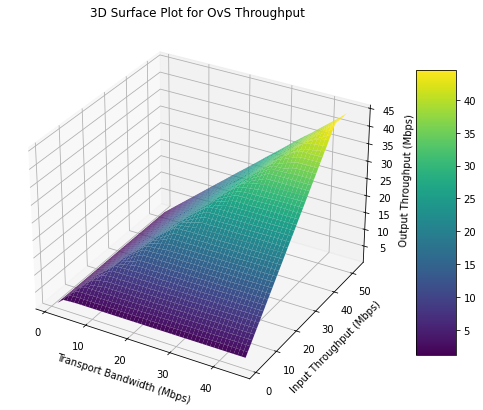

In [14]:

# Step 1: Initialize the Data Generatr
ovs_data_gen = DataGenerator("./ovs/input_dataset.pkl", "./ovs/output_dataset.pkl", vnf_type='OvS')

# Step 2: Inspect Dataset Columns
print("Input dataset columns:", ovs_data_gen.train_input.columns.tolist())
print("Output dataset columns:", ovs_data_gen.train_output.columns.tolist())

# Step 3: Preview the Data
print("\n\nInput dataset sample:")
display(ovs_data_gen.train_input.head())
print("\n\nOutput dataset sample:")
display(ovs_data_gen.train_output.head())

# Step 4: Statistical Summary
print("\n\nInput dataset description:")
display(ovs_data_gen.train_input.describe())
print("\n\nOutput dataset description:")
display(ovs_data_gen.train_output.describe())

# Step 5: Visualize the Dataset in 3D
ovs_data_gen.create_3d_plot()

